<a href="https://colab.research.google.com/github/Naledge/ml-homework1/blob/master/Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df_id = pd.read_csv('train_identity.csv', low_memory=False)
df_id = df_id.sample(frac=1).reset_index(drop=True)
df_id.fillna(0, inplace=True)

df_trans = pd.read_csv('train_transaction.csv', low_memory=False)
df_trans = df_trans.sample(frac=1).reset_index(drop=True)
df_trans.fillna(0, inplace=True)
df_trans.shape

(590540, 394)

In [3]:
df_id.shape

(144233, 41)

In [0]:
df = pd.merge(df_trans, df_id, on='TransactionID', how='left')

In [5]:
df.shape

(590540, 434)

In [6]:
fraud = df.loc[df['isFraud'] == 1]
non_frauds = df.loc[df['isFraud'] == 0]
print(len(fraud))
print(len(non_frauds))
len(fraud)/len(non_frauds)*100

20663
569877


3.625870143908247

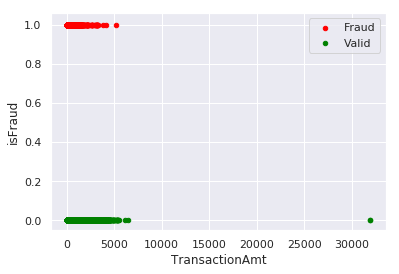

In [7]:
ax = fraud.plot.scatter(x='TransactionAmt', y='isFraud', color='Red', label='Fraud')
non_frauds.plot.scatter(x='TransactionAmt', y='isFraud', color='Green', label='Valid', ax=ax)
plt.show()

In [8]:
df[df.select_dtypes(include=['object']).columns]

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_12,id_15,id_16,id_23,id_27,id_28,id_29,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,W,visa,debit,gmail.com,0,T,T,T,M0,T,T,F,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,H,visa,debit,anonymous.com,anonymous.com,0,0,0,0,0,0,0,0,0,NotFound,New,NotFound,0,0,New,NotFound,Windows 7,chrome 64.0,1440x900,match_status:2,T,F,T,T,desktop,Windows
2,W,discover,credit,gmail.com,0,T,T,T,M0,T,T,T,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,W,visa,debit,yahoo.com,0,T,T,F,M0,F,F,T,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,W,mastercard,debit,gmail.com,0,T,T,T,M0,F,F,F,F,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,W,visa,credit,yahoo.com,0,T,T,T,M0,F,F,F,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,W,mastercard,debit,anonymous.com,0,T,T,T,0,0,F,F,F,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,W,visa,debit,yahoo.com,0,T,T,T,0,0,T,T,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,W,visa,debit,0,0,0,0,0,M0,F,F,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,W,visa,credit,gmail.com,0,T,T,T,M0,F,T,F,F,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
card6_dummy_df = pd.get_dummies(df['card6'])

In [10]:
card6_dummy_df

,0,charge card,credit,debit,debit or credit
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0
5,0,0,1,0,0
6,0,0,0,1,0
7,0,0,0,1,0
8,0,0,0,1,0
9,0,0,1,0,0


In [0]:
df = pd.concat([df, card6_dummy_df], axis=1)

In [12]:
df.shape

(590540, 439)

In [14]:
df = df._get_numeric_data()
df = df.dropna()
len(df[df['isFraud'] == 1])/len(df)*100

7.847025299342036

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [0]:
x = df.drop(['isFraud'], axis=1)
y = df['isFraud']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [0]:
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score


In [20]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train)



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
print('Score: ', lr.score(X_test, y_test))

Score:  0.9216778368384562


In [0]:
y_pred = lr.predict(X_test)

In [24]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,39881,1,39882
1,3388,0,3388
All,43269,1,43270


In [25]:
recall_score(y_test, y_pred)

0.0

In [26]:
accuracy_score(y_test, y_pred)

0.9216778368384562